In [ ]:
# %pip install tifffile numpy matplotlib napari[all]
# %pip install "napari[all]" # if you are using Mac

In [1]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
import napari

In [2]:
import owncloud
import os

if not os.path.exists('data'):
    print('Creating directory for data')
    os.mkdir('data')

if not os.path.exists('data/cell1.tif'):
    oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/RRU6CghB2O1tCFs')
    oc.get_file('/', 'data/cell1.tif');

if not os.path.exists('data/cell2.tif'):
    oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/6V9seZuhhJpul1y')
    oc.get_file('/', 'data/cell2.tif');

if not os.path.exists('data/cell3.tif'):
    oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/NWfGwHzF0W34sRY')
    oc.get_file('/', 'data/cell3.tif');

if not os.path.exists('data/multi_cell.tif'):
    oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/FB21ECmeJgmfUqQ')
    oc.get_file('/', 'data/multi_cell.tif');

In [4]:
movie = tiff.imread('data/multi_cell.tif')
cell1_data = tiff.imread('data/cell1.tif')
cell2_data = tiff.imread('data/cell2.tif')
cell3_data = tiff.imread('data/cell3.tif')

## Loading Movies and Images on Napari

**Example** Load and play frames of `Cell 1`. Close the viewer once you are done.

In [4]:
viewer = napari.Viewer()
viewer.add_image(cell1_data, name='Cell 1')

<Image layer 'Cell 1' at 0x28875b60980>

In [5]:
viewer.close()

Load and play the first 100 frames of `Cell 1`. Close the viewer once you are done.

In [6]:
viewer = napari.Viewer()
viewer.add_image(cell1_data[:100], name='Cell 1')

<Image layer 'Cell 1' at 0x28873df9520>

In [7]:
viewer.close()

Load and play 10 frames from 1000th frame of `Cell 1`. Close the viewer once you are done.

In [8]:
viewer = napari.Viewer()
viewer.add_image(cell1_data[1000:1010], name='Cell 1')

<Image layer 'Cell 1' at 0x2880949ce30>

In [9]:
viewer.close()

## Labelling in napari

Let us label single neurons in Napari using the brush tool.

In [2]:
viewer = napari.Viewer()

**Example** Open mean projection of `cell1`

In [5]:
mean_proj = cell1_data.mean(axis=0)
viewer.add_image(mean_proj, name="Mean", colormap="gray")

<Image layer 'Mean' at 0x21ce65c9460>

Add max projection of `Cell1` to an existing napari viewer

In [6]:
max_proj = cell1_data.max(axis=0)
viewer.add_image(max_proj, name="Max", colormap="gray")

<Image layer 'Max' at 0x21ce5edc2c0>

Add std projection of `Cell1` to an existing napari viewer

In [7]:
std_proj = cell1_data.std(axis=0)
viewer.add_image(std_proj, name="Std", colormap="gray")

<Image layer 'Std' at 0x21cf13f4c20>

**Create a cell mask for Cell 1**
- Click on New Labels Layer and rename it as `roi`.
- Click the brush icon or press `B` to select the brush tool.
- Carefully paint over the cell body of the selected neuron.
- OR: Use the paint bucket tool to fill enclosed regions.

We can access the layers from the jupyter notebook directly without having to first export it to another file.

**Example** Access roi and plot it in the notebook.

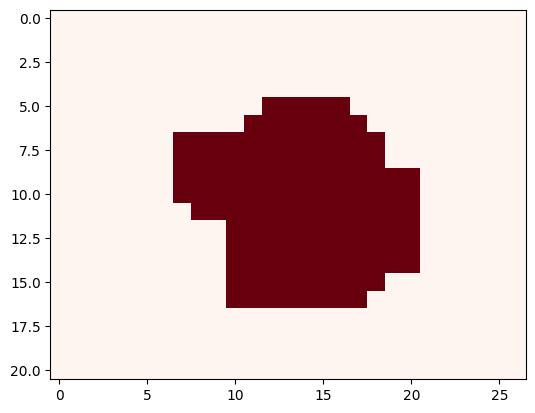

In [14]:
roi = viewer.layers['roi'].data
plt.imshow(roi, cmap='Reds');

Add/remove few pixels in napari from the roi layer. Access roi and plot here.

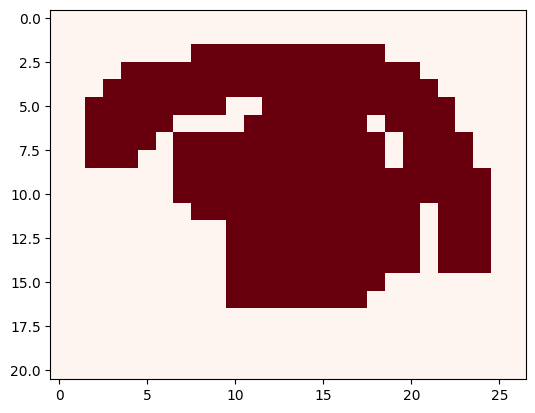

In [15]:
roi = viewer.layers['roi'].data
plt.imshow(roi, cmap='Reds');

Close viewer

In [8]:
viewer.close()

Napari can handle multiple neurons in a single Labels layer by treating neurons painted in different colors as a different neuron. The steps to identify multiple neurons in a single layer is below.

- Create a new labels layer.
- Select the brush tool: Press B to switch to the brush tool, or click the brush icon in the left toolbar.
- Set the brush size to small size:
   - Paint a rough outline of a neuron.
   - Carefully paint over the neuron body. 
- Move to the next label index:
   - Press M to increment the label index.
   - This will automatically update the label color, so the next neuron will appear in a new color.
- Repeat steps 2–6 for each neuron:
   - For each new neuron:
      - Paint its contour.
      - Use the fill tool to create a clean mask.
      - Press M to move to the next label index.
- Review all labeled ROIs: Zoom out and visually inspect the full image.


In [9]:
viewer = napari.Viewer()
viewer.add_image(movie.std(axis=0))

<Image layer 'Image' at 0x21cdaed3740>

Label multiple neurons in the summary image added in napari in a layer named `rois`.

In [10]:
rois = viewer.layers['rois'].data

**Example** Access the first neuron and plot it here.

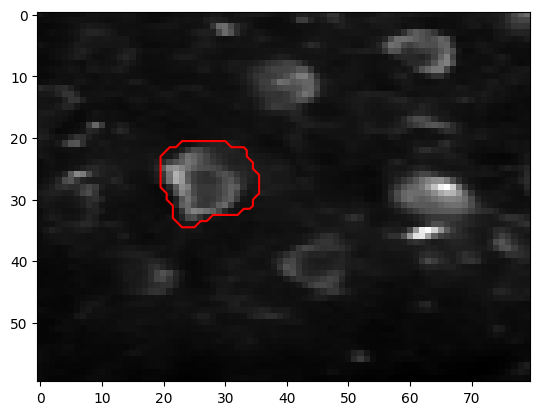

In [11]:
mask = (rois == 1)
plt.imshow(movie.std(axis=0), cmap='gray')
plt.contour(mask, colors='r')

Access second neuron and plot it here.

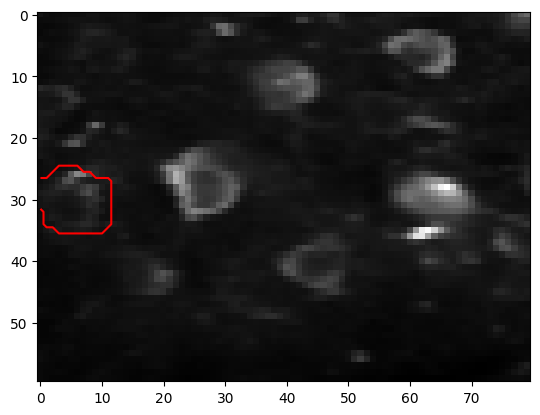

In [12]:
mask = (rois == 2)
plt.imshow(movie.std(axis=0), cmap='gray')
plt.contour(mask, colors='r')

Access the zeroth position and plot it here.

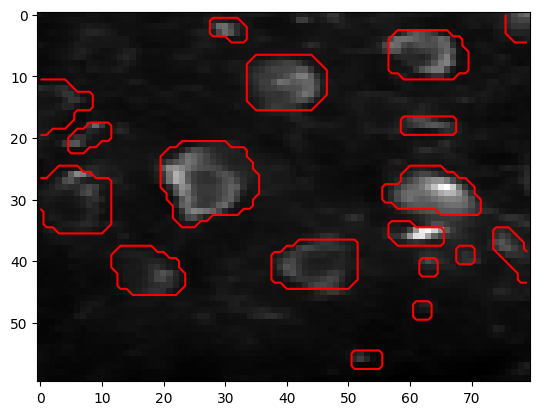

In [13]:
mask = (rois == 0)
plt.imshow(movie.std(axis=0), cmap='gray')
plt.contour(mask, colors='r')

## Isolating ROI Pixels

To extract a trace for a given ROI, we must first identify which pixels it occupies in the field of view. This section focuses on converting labelled ROI data into binary masks—arrays that define the spatial footprint of each individual neuron. Using these masks, we can isolate and examine raw pixel values belonging to each ROI. 

With this mask, we can easily extract the calcium trace from a specific neuron with

```python
mask = rois == 1             # Create a boolean mask where pixels belonging to ROI 1 are True

movie[:, mask]              # Select only the ROI pixels at each time point ([frames, num_pixels_in_roi])

.mean(axis=1)               # Compute the average fluorescence across ROI pixels for each frame)
```

**Example** Plot calcium trace from 1st neuron.

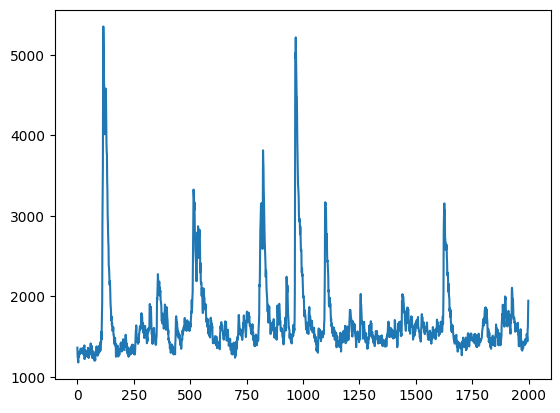

In [14]:
mask = rois == 1
cal_trace = movie[:, mask].mean(axis=1)
plt.plot(cal_trace)

Plot calcium trace from 2nd neuron.

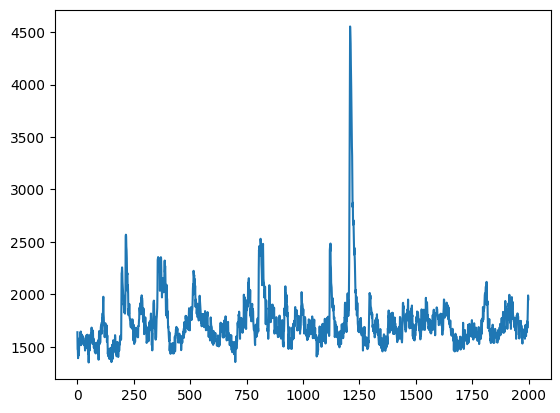

In [15]:
mask = rois == 2
cal_trace = movie[:, mask].mean(axis=1)
plt.plot(cal_trace)

Plot calcium trace from 3rd neuron.

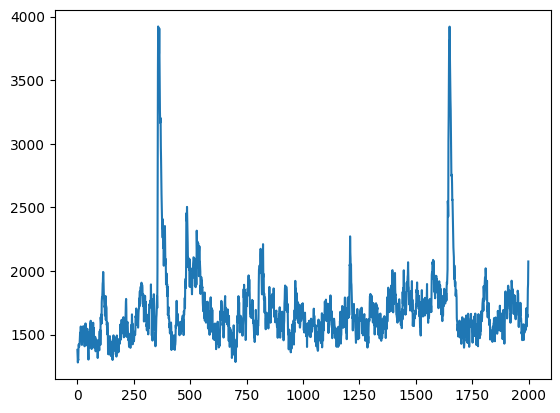

In [16]:
mask = rois == 3
cal_trace = movie[:, mask].mean(axis=1)
plt.plot(cal_trace)

## For-Loops for Storing Multiple Calcium Traces

We usually have several neurons imaged simulataneously and they are all typically stored in a single matrix such that each row of that matrix represents calcium trace of a single neuron. In this section, we restructure the calcium traces extracted from our data into that format.

**Example** Store all frames for the first two neurons in single array.

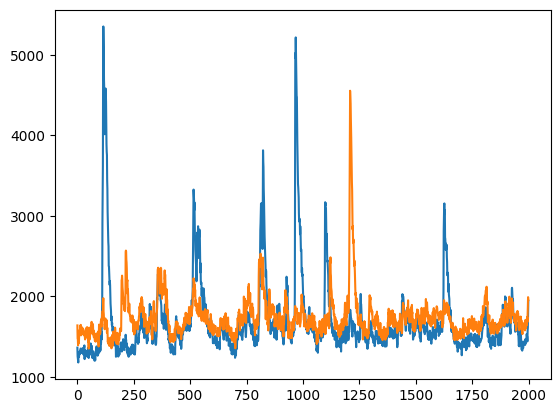

In [17]:
n_frames = movie.shape[0]
traces = np.zeros((2, n_frames))
traces[0] = movie[:, rois == 1].mean(axis=1)
traces[1] = movie[:, rois == 2].mean(axis=1)

plt.plot(traces[0])
plt.plot(traces[1])

Store all frames for the first three neurons in single array.

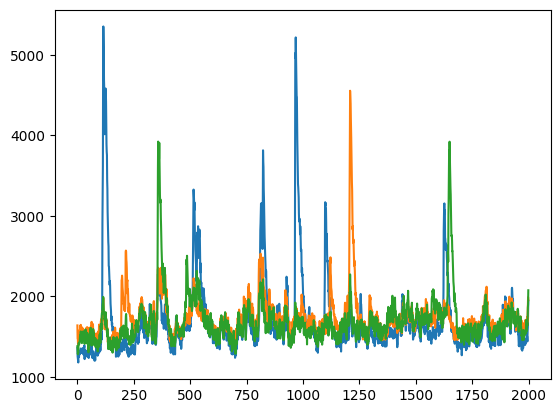

In [18]:
n_frames = movie.shape[0]
traces = np.zeros((3, n_frames))
traces[0] = movie[:, rois == 1].mean(axis=1)
traces[1] = movie[:, rois == 2].mean(axis=1)
traces[2] = movie[:, rois == 3].mean(axis=1)


plt.plot(traces[0])
plt.plot(traces[1])
plt.plot(traces[2])

Store all frames for the first four neurons in single array.

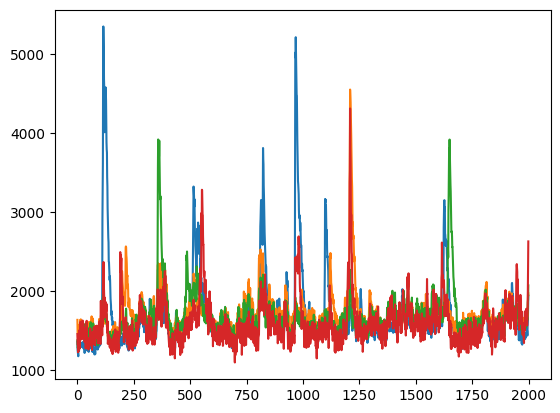

In [19]:
n_frames = movie.shape[0]
traces = np.zeros((4, n_frames))
traces[0] = movie[:, rois == 1].mean(axis=1)
traces[1] = movie[:, rois == 2].mean(axis=1)
traces[2] = movie[:, rois == 3].mean(axis=1)
traces[3] = movie[:, rois == 4].mean(axis=1)

plt.plot(traces[0])
plt.plot(traces[1])
plt.plot(traces[2])
plt.plot(traces[3])

It can be tedious to do this manually especially when we have many number of neurons. We can use for-loop to do the same for multiple rois by

```python
traces = np.zeros((2, 2000))        # Create an empty array to store calcium traces for two ROIs (2 ROIs, 2000 frames)

for roi_num in range(1, 3):         # Loop through each ROI (1 and 2)
    mask = rois == roi_num          # Create a boolean mask for the current ROI
    trace = movie[:, mask].mean(axis=1)  # average fluorescence for the current ROI across all pixels at each time point
    traces[roi_num - 1] = trace     # Store the calcium trace for the current ROI in the 'traces' array
```

**Example** Use for loop to fill first two rois in their respective locations in `traces`.

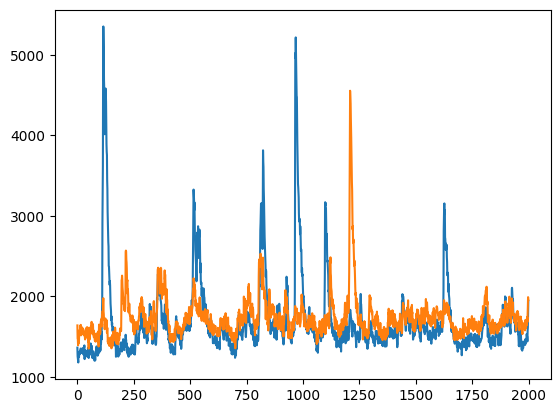

In [20]:
traces = np.zeros((2, 2000))

for roi_num in range(1, 3):
    mask = rois == roi_num
    trace = movie[:, mask].mean(axis=1)
    traces[roi_num - 1] = trace

plt.plot(traces[0])
plt.plot(traces[1])

Use for loop to fill first three rois in their respective locations in `traces`.

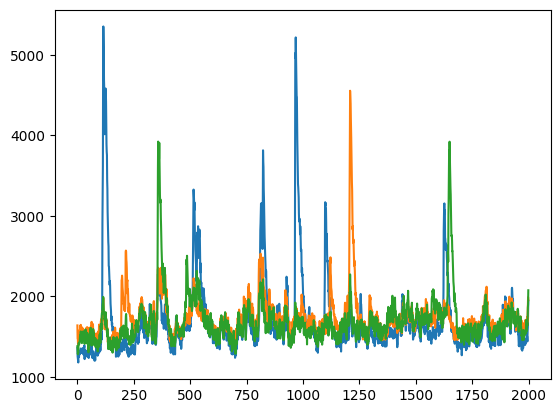

In [21]:
traces = np.zeros((3, 2000))

for roi_num in range(1, 4):
    mask = rois == roi_num
    trace = movie[:, mask].mean(axis=1)
    traces[roi_num - 1] = trace

plt.plot(traces[0])
plt.plot(traces[1])
plt.plot(traces[2])

Use for loop to fill all rois in their respective locations in `traces`.

In [22]:
np.unique(rois)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=uint8)

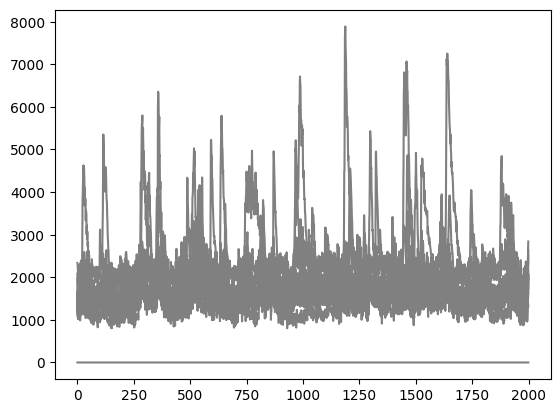

In [23]:
roi_nums = len(np.unique(rois))
traces = np.zeros((roi_nums, 2000))

for roi_num in range(1, roi_nums):
    mask = rois == roi_num
    trace = movie[:, mask].mean(axis=1)
    traces[roi_num - 1] = trace

for i in range(len(traces)):
    plt.plot(traces[i], color='gray');

## Interpreting and Visualizing Extracted Traces

This section introduces simple plotting tools to inspect both individual traces and full populations of neurons. Visualization helps verify the success of the extraction process, and also offers a first glimpse into the temporal structure of the data. 

**Example** Plot location and trace of neuron 1.

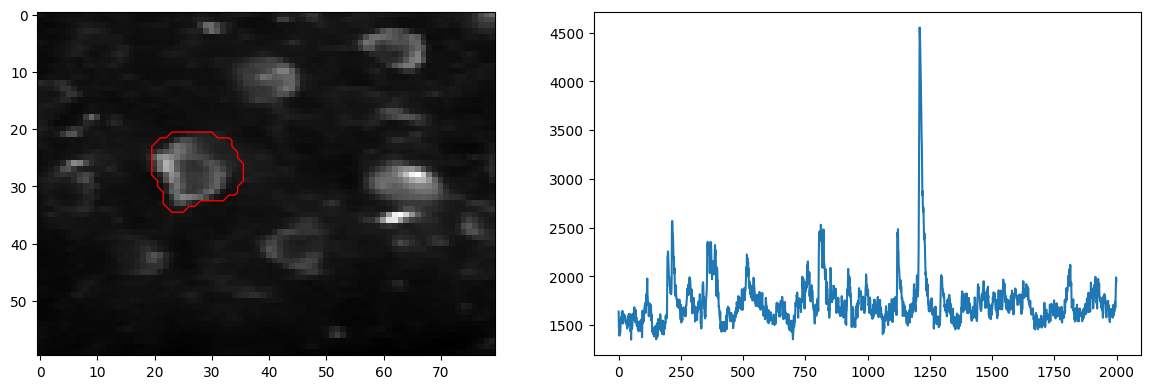

In [ ]:
roi_num = 1
summary_image = movie.std(axis=0)
mask = rois == roi_num

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(summary_image, cmap='gray')
axes[0].contour(mask, colors='red', linewidths=1)

axes[1].plot(traces[roi_num-1])

plt.tight_layout()

Plot location and trace of neuron 2.

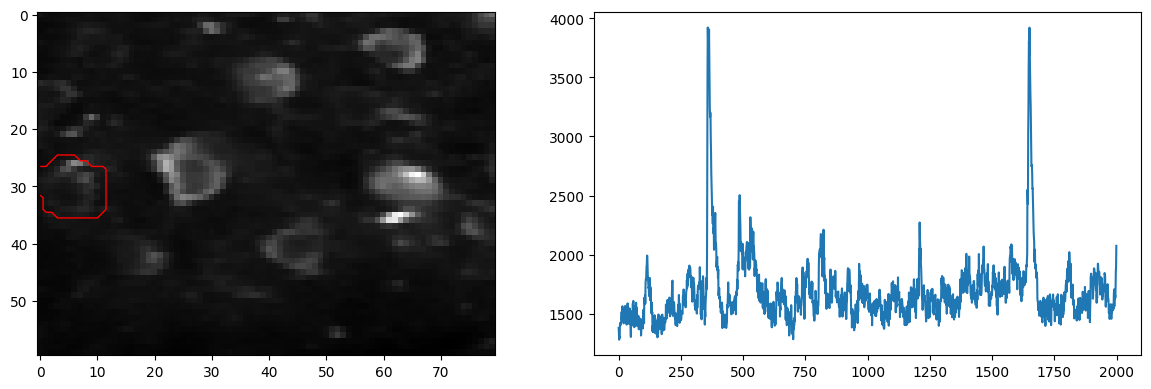

In [ ]:
roi_num = 2
summary_image = movie.std(axis=0)
mask = rois == roi_num

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(summary_image, cmap='gray')
axes[0].contour(mask, colors='red', linewidths=1)

axes[1].plot(traces[roi_num-1])

plt.tight_layout()

Plot location and trace of neuron 3.

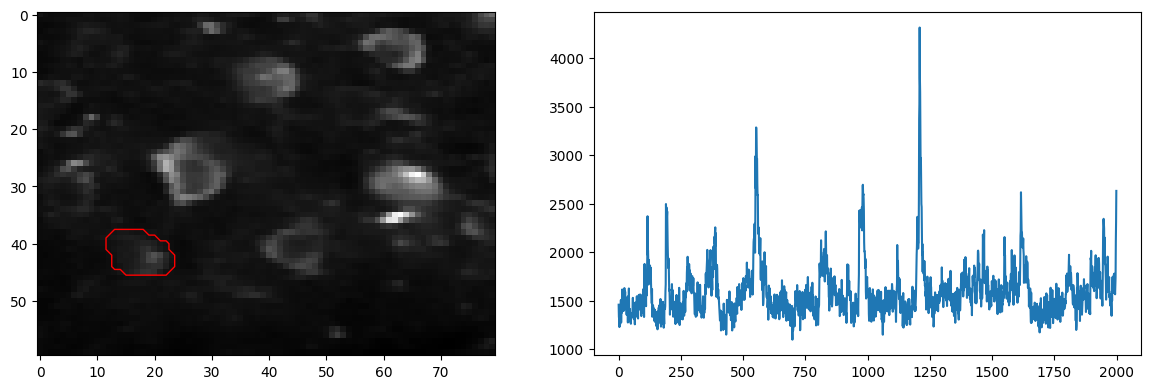

In [ ]:
roi_num = 3
summary_image = movie.std(axis=0)
mask = rois == roi_num

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(summary_image, cmap='gray')
axes[0].contour(mask, colors='red', linewidths=1)

axes[1].plot(traces[roi_num-1])

plt.tight_layout()

(**DEMO**) Interactive plot

In [ ]:
%matplotlib inline

from ipywidgets import interact, IntSlider
import ipywidgets as widgets


roi_nums = np.unique(rois)[1:]
summary_image = movie.std(axis=0)

def plot_neuron_trace(roi_idx):
    mask = rois == roi_idx

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].imshow(summary_image, cmap='gray')
    axes[0].contour(mask, colors='red', linewidths=1)
    axes[0].set_title(f"ROI {roi_idx} Location")
    axes[0].axis("off")

    axes[1].plot(traces[roi_idx - 1])
    axes[1].set_title(f"Fluorescence Trace (ROI {roi_idx})")
    axes[1].set_xlabel("Frame")
    axes[1].set_ylabel("Fluorescence")

    plt.tight_layout()
    plt.show()

interact(plot_neuron_trace, roi_idx=IntSlider(min=1, max=len(roi_nums), step=1, value=0));


interactive(children=(IntSlider(value=1, description='roi_idx', max=18, min=1), Output()), _dom_classes=('widg…

## (DEMO) Load Numpy Arrays as ROIs on Napari


1. File -> Open File(s)
2. Choose rois.npy file
3. Right click on the new layer and choose `Convert to Labels`